1.	Import libraries that you required and Load the data set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [3]:
zomato = pd.read_csv("C:/Users/Pawan Kumar/Desktop/Mini Project/Project 3-1 (1)/Project 3/Zomoto.CSV")

#Deleting Unnnecessary Columns
data=zomato.drop(['url','dish_liked','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

#Removing the Duplicates
data.duplicated().sum()
data.drop_duplicates(inplace=True)

#Remove the NaN values from the dataset
data.isnull().sum()
data.dropna(how='any',inplace=True)

#Changing the column names
data = data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

#Some Transformations
data['cost'] = data['cost'].astype(str) #Changing the cost to string
data['cost'] = data['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
data['cost'] = data['cost'].astype(float) # Changing the cost to Float

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7669 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    7669 non-null   int64  
 1   address       7669 non-null   object 
 2   name          7669 non-null   object 
 3   online_order  7669 non-null   object 
 4   book_table    7669 non-null   object 
 5   rate          7669 non-null   object 
 6   votes         7669 non-null   int64  
 7   location      7669 non-null   object 
 8   rest_type     7669 non-null   object 
 9   cuisines      7669 non-null   object 
 10  cost          7669 non-null   float64
 11  reviews_list  7669 non-null   object 
 12  menu_item     7669 non-null   object 
 13  type          7669 non-null   object 
 14  city          7669 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 958.6+ KB


Q2- Which are the top restaurant chains based on the distribution(frequency) in Bangaluru?

In [4]:
# Finding top 3 restaurants in Bengaluru based on frequency of their counts in our dataset
data['name'].value_counts().head(3)     

McDonald's        16
Baskin Robbins    16
Keventers         15
Name: name, dtype: int64

3.	How many restaurants do not accept online orders?

In [5]:
# Finding all the observations from our dataset which does not accept online orders
data[data['online_order']=='No'].shape[0]

2632

4.	What is the ratio b/w restaurants that provide and do not provide table booking?

In [6]:
# Finding ratio of observations "with Table booking" and "without Table booking" from our dataset
a4= float (data[data['book_table']=="Yes"].shape[0])
b4= float (data[data['book_table']=="No"].shape[0])
print("The ratio between restaurants that provide and do not provide table booking are :"+str(a4/b4))

The ratio between restaurants that provide and do not provide table booking are :0.1713762028409959


5.	Use a boxplot on the rating column. Use User Defined Function or Lambda function or Apply function to extract the data that comes before /. Kindly exclude /.

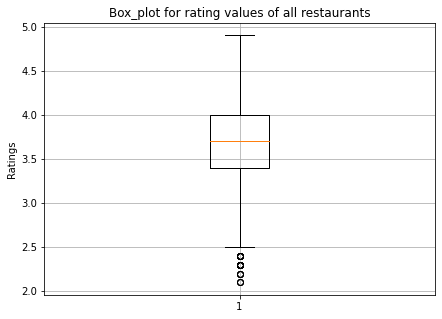

In [9]:
# Removing 'New', '-', '/5' from Rates
# Using matplotlib library to construct boxplot for ratings
data_rate = data.loc[data.rate !='NEW']
data_rate = data_rate.loc[data_rate.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
data_rate.rate = data_rate.rate.apply(remove_slash).str.strip().astype('float')
data_rate['rate'].head()

fig = plt.figure(figsize =(7, 5))
plt.boxplot(data_rate['rate'])
plt.grid(which = 'both',axis = 'both')
plt.ylabel("Ratings")
plt.title('Box_plot for rating values of all restaurants')
plt.show()

6.	Online and Offline orders restaurants percentage.

In [10]:
# Finding the percentage of observations with 'Online orders' w.r.t total observations
# Finding the percentage of observations with 'Offline orders' (i.e. without online orders) w.r.t total observations
a = float(data[data['online_order']=="Yes"].shape[0])
b = float(data[data['online_order']=="No"].shape[0])
c = float(data.shape[0])
print("percentage of restaurants having online orders : "+str(a*100/c)+"%")
print("percentage of restaurants not having online orders : "+str(b*100/c)+"%")

percentage of restaurants having online orders : 65.68001043160777%
percentage of restaurants not having online orders : 34.31998956839223%


7.	 Plot the scatter plot using the Cost vs rating variable with respect to online order. Use apply the function Or other function to remove the “,”.

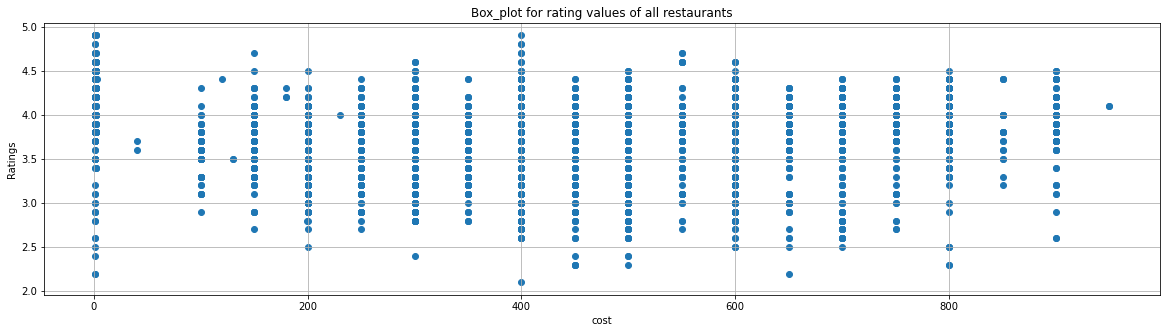

In [20]:
a6 = list(data[data['online_order']=="Yes"]["cost"])  # Creating list of cost values from our observations with online orders
b6 = list(data[data['online_order']=="Yes"]["rate"])  # Creating list of rate values from our observations with online orders
fig = plt.figure(figsize =(20, 5))
plt.scatter(x = a6,y = b6)                            # Scatter Plotting the 'Rate' values w.r.t 'Cost' values 
plt.grid(which = 'both',axis = 'both')
plt.ylabel("Ratings")
plt.xlabel("cost")
plt.title('Box_plot for rating values of all restaurants')
plt.show()

8.	Find the distribution of the votes and Approx_cost using a user-defined function and for a loop.

(array([434.,  24.,  67., 145., 220., 101., 131.,  70.,  67.,  29.]),
 array([  1. ,  95.9, 190.8, 285.7, 380.6, 475.5, 570.4, 665.3, 760.2,
        855.1, 950. ]),
 <BarContainer object of 10 artists>)

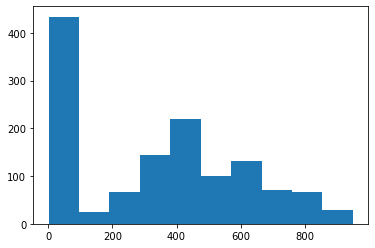

In [44]:
plt.hist(data.groupby("votes").cost.mean())

9.	Which are the most common restaurant type in Banglore?

In [ ]:
data['rest_type'].value_counts().head(3)

10.	Is there any difference b/w the votes of restaurants accepting and not accepting online orders?

In [ ]:
a = data[data["online_order"]=='No']["votes"].sum()

b = data[data["online_order"]=='Yes']["votes"].sum()

print("The difference between the votes of restaurants accepting online orders and those not accepting online orders are : ",b - a)

In [ ]:
data.head(5)

Q. 11- Same as 9

12.Find the Best budget Restaurants in any location.

13.	Top quick bites restaurant chains in Banglore.

In [51]:
df13 = data[data["rest_type"] == 'Quick Bites']
df_by_chain_count = df13.groupby('name')['votes'].agg(['mean', 'count'])
print (df_by_chain_count.sort_values(by='count',ascending=False).head())

## KFC is the top quick bite restaurant chain in Bangalore

                                 mean  count
name                                        
McDonald's                 249.625000     16
KFC                        439.500000     14
SGS Non Veg - Gundu Pulav   74.666667     12
Pathaan Sir                131.000000     11
Ambur Hot Dum Biryani       20.700000     10


14.Which are the most popular casual dining restaurant chains, Make use of any plot related to this question?

Text(0.5, 0, 'Number of outlets')

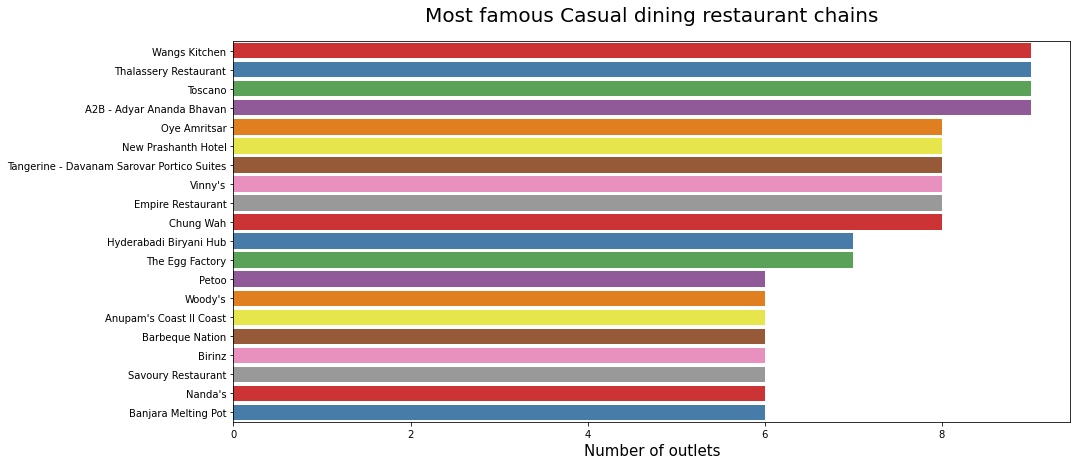

In [52]:
df_casual = data[data["rest_type"] == 'Casual Dining']
plt.figure(figsize=(15,7))
chains=df_casual['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous Casual dining restaurant chains",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)


15.Which are the most popular cuisines of Bangalore using a related plot?

Text(0.5, 0, 'Number of outlets')

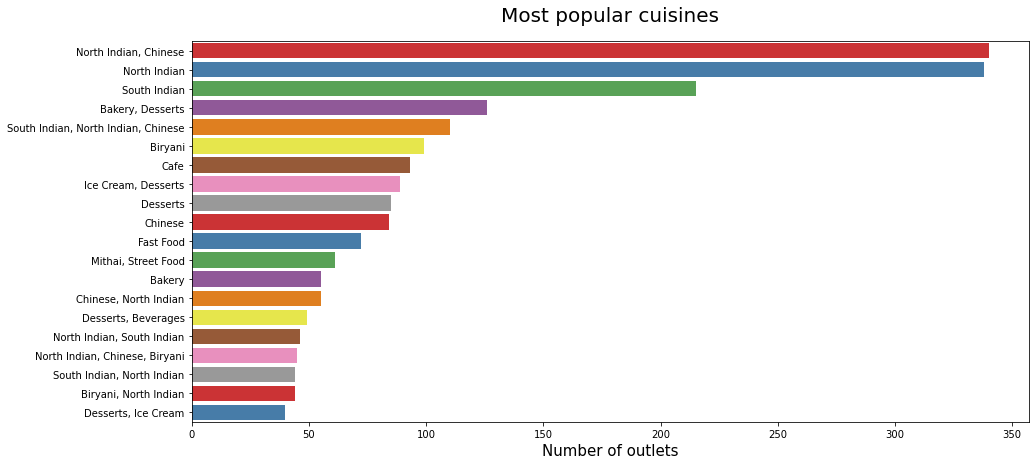

In [54]:
plt.figure(figsize=(15,7))
chains=data['cuisines'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most popular cuisines",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)